<a href="https://colab.research.google.com/github/JustinL01/SC1015_B137_Team2_MiniProject/blob/main/Team2_B137_hotel_reservation_miniproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SC1015 B137 Team 2


Team Members: Leong Justin, Shaun Gan Yew Han, Roy Tan Wei Ming

#Details of data

**Source:**

https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset



**Column	Description:**

Booking_ID	Unique identifier of the booking.

no_of_adults - The number of adults.

no_of_children - The number of children.

no_of_weekend_nights - Number of weekend nights (Saturday or Sunday).

no_of_week_nights - Number of week nights (Monday to Friday).

type_of_meal_plan - Type of meal plan included in the booking.

required_car_parking_space - Whether a car parking space is required.

room_type_reserved - The type of room reserved.

lead_time - Number of days before the arrival date the booking was made.

arrival_year - Year of arrival.

arrival_month - Month of arrival.

arrival_date - Date of the month for arrival.

market_segment_type - How the booking was made.

repeated_guest - Whether the guest has previously stayed at the hotel.

no_of_previous_cancellations - Number of previous cancellations.

no_of_previous_bookings_not_canceled - Number of previous bookings that were canceled.

avg_price_per_room - Average price per day of the booking.

no_of_special_requests - Count of special requests made as part of the booking.

booking_status - Whether the booking was cancelled or not.


With the introduction of online hotel reservation channels, it has substantially changed booking possibilities and customers’ behaviour. A significant number of hotel reservations are called-off due to cancellations or no-shows, which then causes hotels to be inefficient and lose money in the long term.

#Problem Definition and Motivation
Can we predict if someone will cancel their hotel reservation, and can we identify key factors that contribute to the cancellation of reservations. Our main motivation is to ensure hotels optimise their operations and minimise losses due to cancellations

The Hotel Reservations Dataset provides a rich source of data, 36275 unique values spanning from the duration of 2017-2018. This dataset can be analysed to determine the key factors that lead to these cancellations. Understanding customer preferences and behaviour is crucial for businesses to attract and retain customers, and hotels can take proactive measures to reduce cancellations and improve customer satisfaction and ultimately gain more profits. 

#Data Preparation and Cleaning


Importing NumPy, Pandas, Matplotlib, and Seaborn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
sb.set()
url='https://drive.google.com/file/d/14Q_5-kb_WLUeIWBxolTwbSKRGl0ay_Io/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]


In [ ]:

hotel_data= pd.read_csv(url)
hotel_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


First off, we checked the cancellation rate of hotel bookings using a pie chart

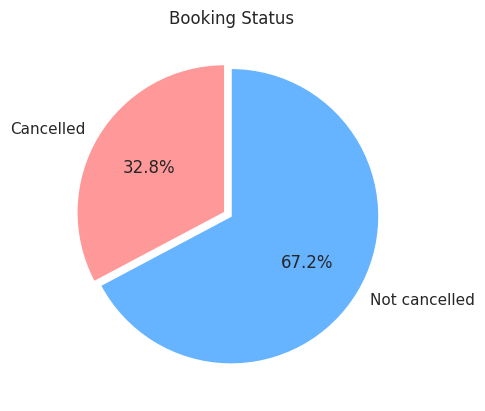

In [ ]:
# Count the number of bookings with different status
status_counts = hotel_data['booking_status'].value_counts()

# Create a pie chart
labels = ['Cancelled', 'Not cancelled']
sizes = [status_counts[0], status_counts[1]]
colors = ['#ff9999','#66b3ff']
explode = (0.05, 0)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Booking Status')

# Show the plot
plt.show()

As we can see, over 30% of all bookings were cancelled, which is a very large number.

Changing Booking status to binary, 0 for cancelled and 1 for not cancelled

In [ ]:
hotel_data['booking_status'].replace(['Canceled','Not_Canceled'],[0,1], inplace=True)

Changing Meal plan, a categorical data, to 1,2,3 and 0(for no meal plan)

In [ ]:
hotel_data['type_of_meal_plan'].replace(['Not Selected','Meal Plan 1',
                                         'Meal Plan 2','Meal Plan 3'],
                                        [0,1,2,3], inplace=True)

Changing room_type_reserved, a categorical data, to 1,2,3,4,5,6,7

In [ ]:
hotel_data['room_type_reserved'].replace(['Room_Type 1','Room_Type 2',
                                         'Room_Type 3','Room_Type 4','Room_Type 5',
                                         'Room_Type 6','Room_Type 7'],
                                        [1,2,3,4,5,6,7], inplace=True)

Changing market_segment_type a categorical data into numbers.
Online:1
Offline:2
Corporate:3
Complementary:4
Aviation:5

In [ ]:
hotel_data['market_segment_type'].replace(['Online', 'Offline', 'Corporate', 'Complementary', 'Aviation'],
                                        [1,2,3,4,5], inplace=True)

Dropping redundant variable "Booking_ID"


In [ ]:
hotel_data = hotel_data.drop("Booking_ID", axis=1)

# Exploratory Data Analysis

Using a heatmap, we observe the correlation between booking_status and the other 17 variables in the dataset.

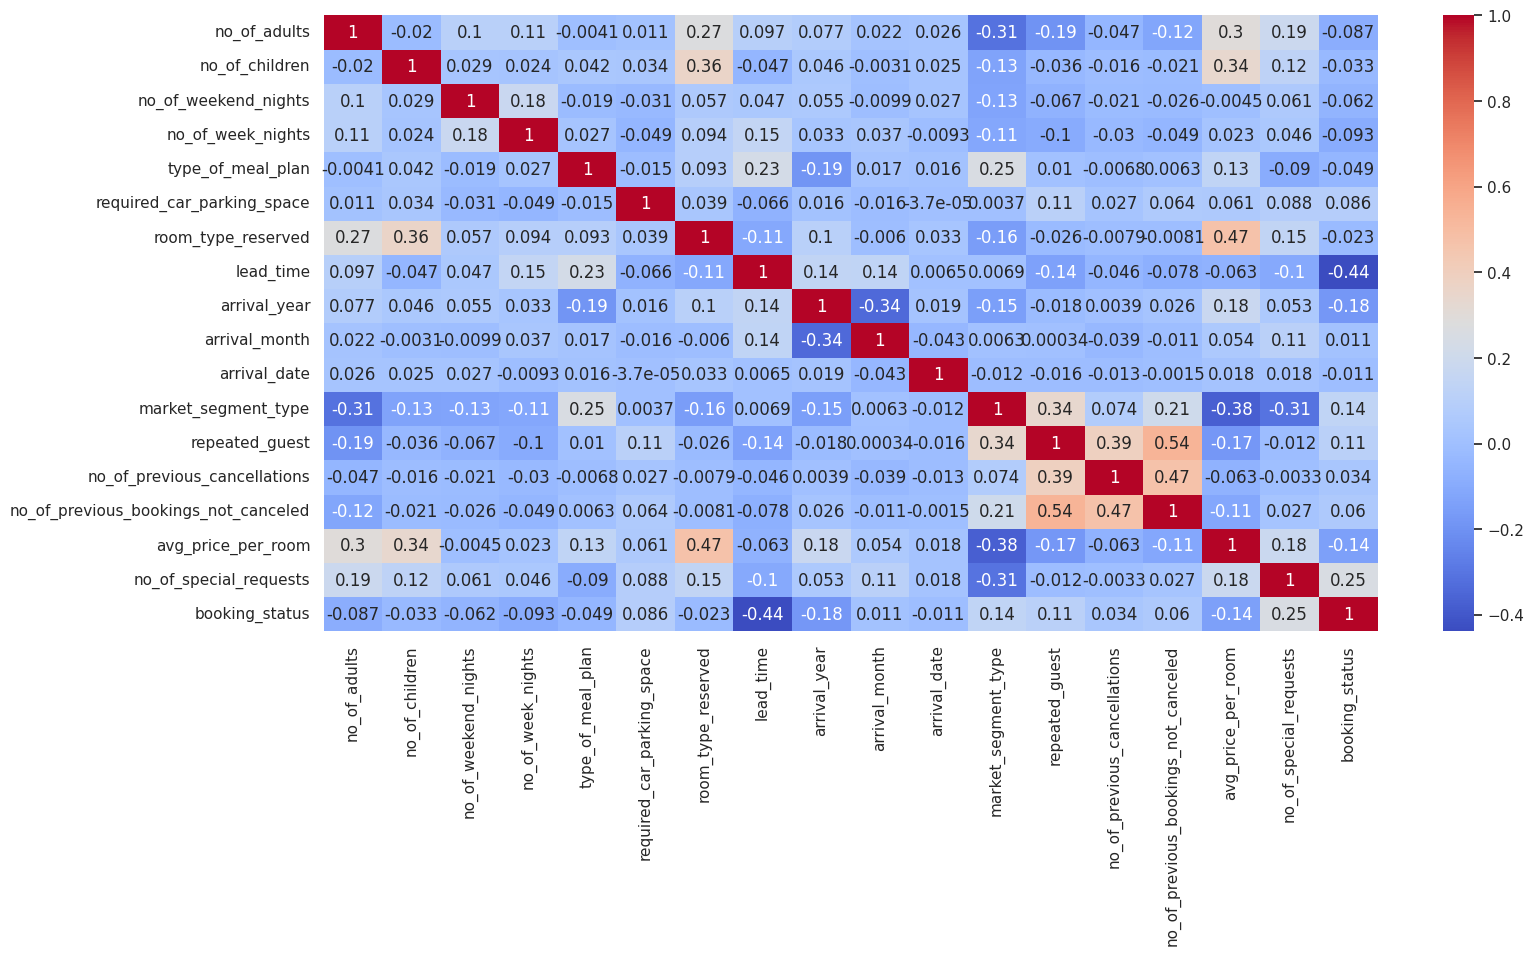

In [ ]:
plt.figure(figsize=(17, 8))
sb.heatmap(hotel_data.corr(), annot=True, cmap='coolwarm')
plt.show()

As seen from the heatmap, each variable has low correlation with one another and with booking status. However, this does not mean that the variables are unrelated to one another. because a low correlation between two variables may not necessarily mean that they are not related, but rather that there are other variables that are also influencing the relationship between them. Hence, we decided to explore the data further to find how they might relate to one another. 


#Learning more about important variables

#"lead_time"

Since lead time has the highest correlation coefficient with booking_status, we decided to learn more about the variable "lead_time" using bar graph.

<Axes: xlabel='lead_time', ylabel='Count'>

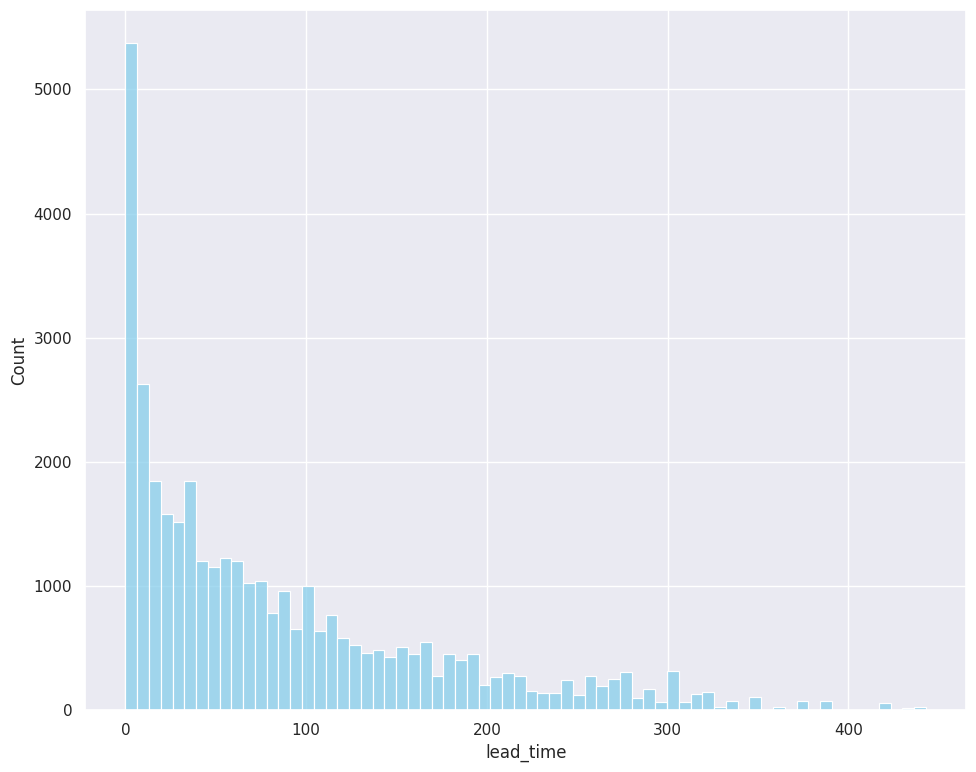

In [ ]:
plt.figure(figsize = (25,20))
sb.set(color_codes = True)

plt.subplot(2,2,1)
sb.histplot(hotel_data['lead_time'], kde = False, color='skyblue')

We can see that most people book hotels closer to the expected time of stay.

#"arrival_month"

Another variable with high correlation is arrival_month.

Histogram to see the how confirmed and cancelled bookings differ across different months of the year.

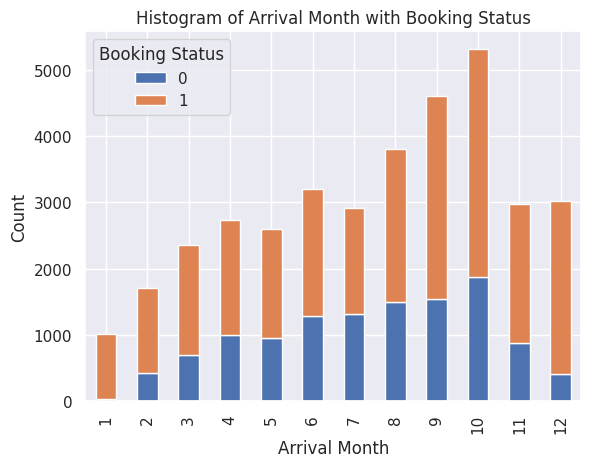

In [ ]:
arrival_month_booking_status = hotel_data[['arrival_month', 'booking_status']]

# Group by arrival_month and booking_status and count the occurrences
grouped_data =arrival_month_booking_status.groupby(['arrival_month', 'booking_status']).size().reset_index(name='count')

# Pivot the grouped data to have booking_status as columns
pivoted_data = grouped_data.pivot_table(index='arrival_month', columns='booking_status', values='count', fill_value=0)

# Plot the histogram
ax = pivoted_data.plot(kind='bar', stacked=True)
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.title('Histogram of Arrival Month with Booking Status')
plt.legend(title='Booking Status')
plt.show()

Line graph to analyse cancellation rate across different months of the year.

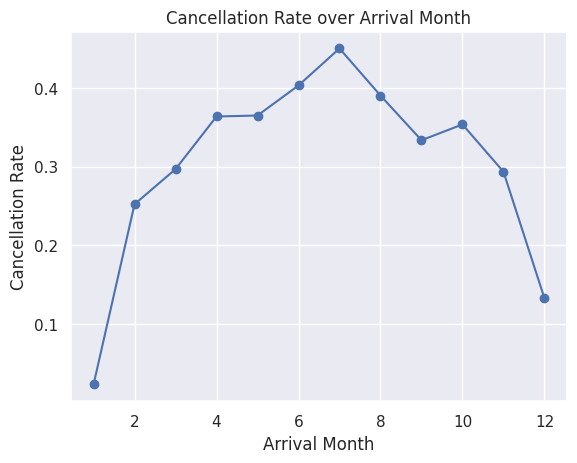

In [ ]:
import matplotlib.pyplot as plt

# Group by arrival_month and booking_status and count the occurrences
grouped_data = hotel_data.groupby(['arrival_month', 'booking_status']).size().reset_index(name='count')

# Pivot the grouped data to have booking_status as columns
pivoted_data = grouped_data.pivot_table(index='arrival_month', columns='booking_status', values='count', fill_value=0)

# Calculate the cancellation rate
pivoted_data['Cancellation Rate'] = pivoted_data[0] / (pivoted_data[0] + pivoted_data[1])

# Plot the line chart
ax = pivoted_data['Cancellation Rate'].plot(kind='line', marker='o')
plt.xlabel('Arrival Month')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate over Arrival Month')
plt.show()

The graphs reveal that the majority of bookings occur between July and October,  which also coincides with the highest cancellation rates.  This insight underscores the need to identify factors influencing bookings and to develop strategies aimed at reducing booking cancellations, particularly during this peak period. 


#"type_of_meal_plan"

Another interesting section we found is the meal plan.

Histogram to see the how confirmed and cancelled bookings differ across different types of meal plan.

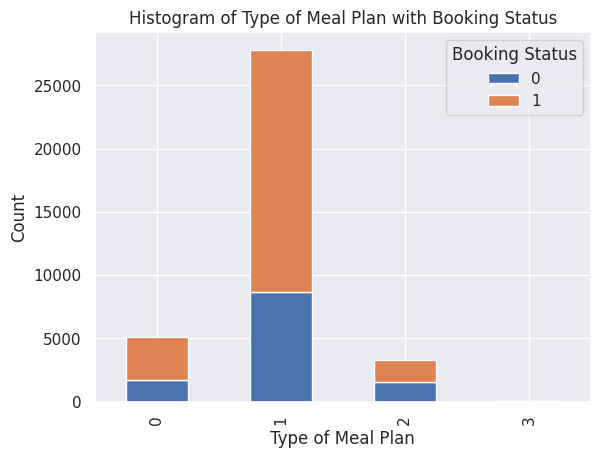

In [ ]:
meal_plan_booking_status = hotel_data[['type_of_meal_plan', 'booking_status']]

# Group by type_of_meal_plan and booking_status and count the occurrences
grouped_data = meal_plan_booking_status.groupby(['type_of_meal_plan', 'booking_status']).size().reset_index(name='count')

# Pivot the grouped data to have booking_status as columns
pivoted_data = grouped_data.pivot_table(index='type_of_meal_plan', columns='booking_status', values='count', fill_value=0)

# Plot the histogram
ax = pivoted_data.plot(kind='bar', stacked=True)
plt.xlabel('Type of Meal Plan')
plt.ylabel('Count')
plt.title('Histogram of Type of Meal Plan with Booking Status')
plt.legend(title='Booking Status')
plt.show()

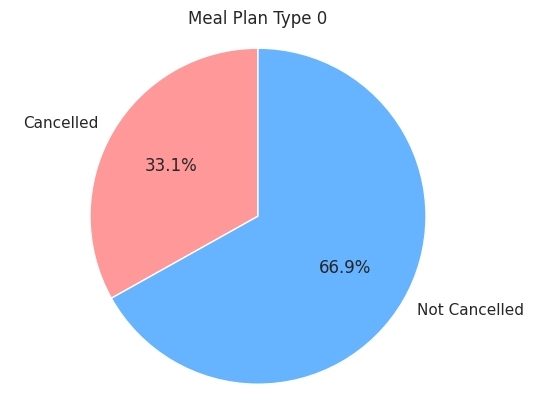

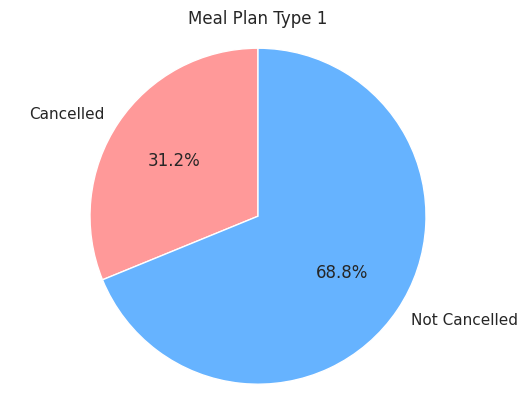

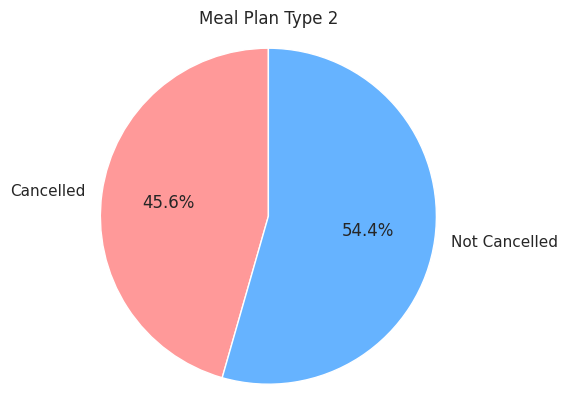

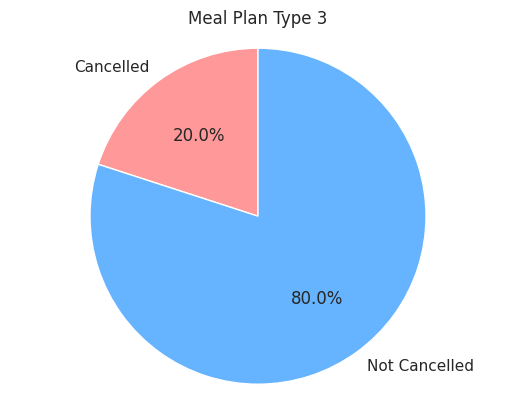

In [ ]:
def generate_pie_chart(data,type_of_plan):
    # Get the data for type_of_meal_plan == 1
    meal_data = data[data['type_of_meal_plan'] == type_of_plan]
    
    # Get the number of cancelled and not cancelled orders
    cancelled = len(meal_data[meal_data['booking_status'] == 0])
    not_cancelled = len(meal_data[meal_data['booking_status'] == 1])
    
    # Create the pie chart
    sizes = [cancelled, not_cancelled]
    labels = ['Cancelled', 'Not Cancelled']
    colors = ['#ff9999','#66b3ff']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f'Meal Plan Type {type_of_plan}')
    plt.axis('equal')
    
    # Show the pie chart
    plt.show()

generate_pie_chart(hotel_data,0)
generate_pie_chart(hotel_data,1)
generate_pie_chart(hotel_data,2)
generate_pie_chart(hotel_data,3)

Based on this graphs and pie charts, we can see that there is an illogical pattern. Between meal plan 0 and meal plan 1,  the cancellation rate stayed fairly constant, but for meal plan 2, the cancellation increased significantly, making us believe that the price of meal plan has an effect on the booking status. However, contradictingly, meal plan 3 has the lowest cancellation rate. This proves that other variables affect the booking_status.

#"avg_price_per_room"

Learning more about spread of variable "avg_price_per_room" using boxplot

<Axes: title={'center': 'Boxplot avg_price_per_room'}, xlabel='avg_price_per_room'>

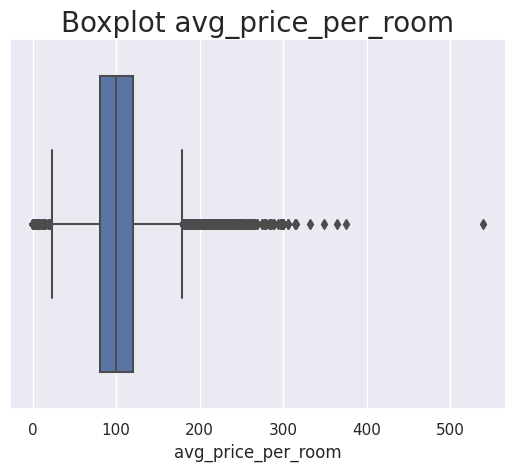

In [ ]:
plt.title("Boxplot avg_price_per_room", fontdict = {'fontsize': 20})
sb.boxplot(x=hotel_data["avg_price_per_room"])


Learning more about variable "avg_price_per_room" using bar plot

<Axes: xlabel='avg_price_per_room', ylabel='Count'>

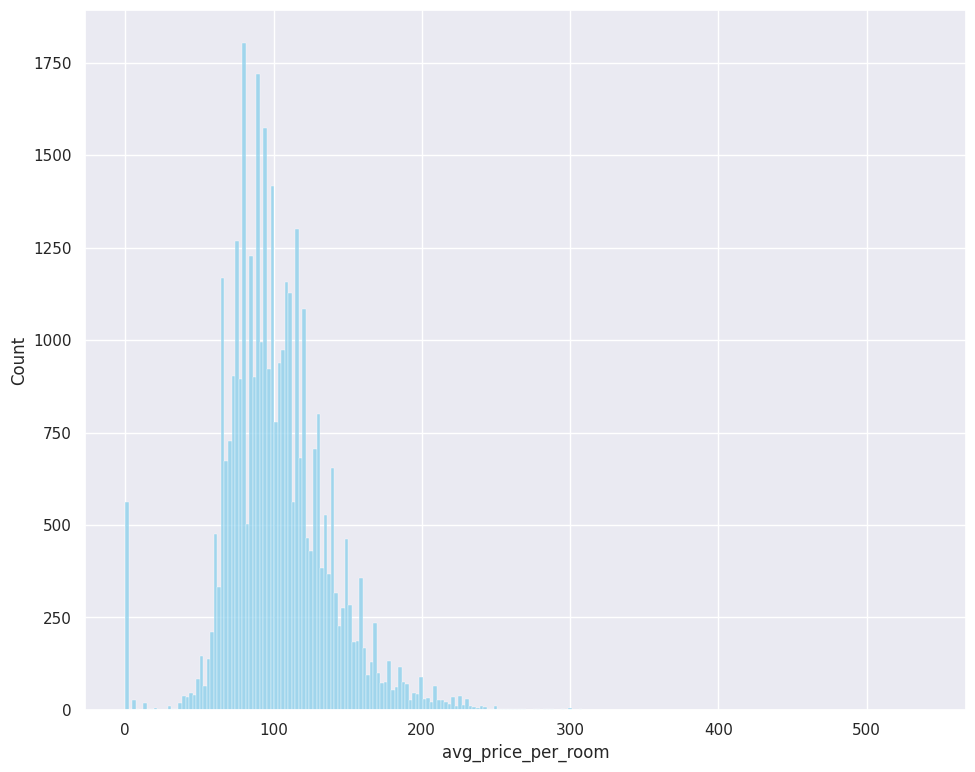

In [ ]:
#
plt.figure(figsize = (25,20))
sb.set(color_codes = True)

plt.subplot(2,2,3)
sb.histplot(hotel_data['avg_price_per_room'], kde = False, color='skyblue')

There are a lot of outliers and referring to the graph, it is surprising to see there were over 500 counts of booking with average price of 0. We then tried to figure out how there could be free bookings.



#"market_segment_type"

Realising the price of 0 are due to complementary bookings, we decided to explore market_segment_type.

We want to exclude market segment types that has the highest not canceled to canceled ratio. By excluding market segment types that have high not cancelled to cancelled ratio, we can then see which are the other variables that affect 
booking_status the most.

Histogram to see the how confirmed and cancelled bookings differ across different market segment types.

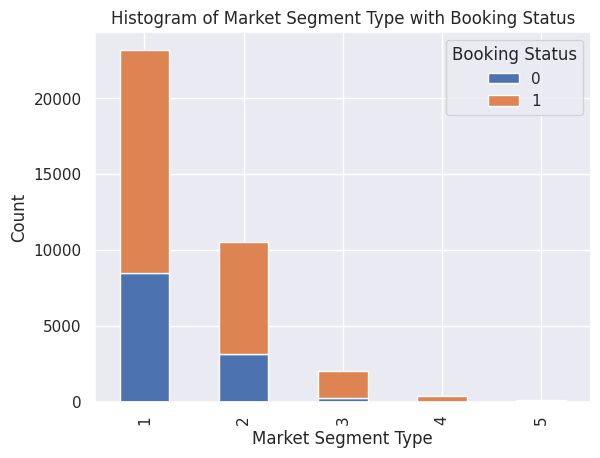

In [ ]:


market_segment_booking_status = hotel_data[['market_segment_type', 'booking_status']]

# Group by market_segment_type and booking_status and count the occurrences
grouped_data = market_segment_booking_status.groupby(['market_segment_type', 'booking_status']).size().reset_index(name='count')

# Pivot the grouped data to have booking_status as columns
pivoted_data = grouped_data.pivot_table(index='market_segment_type', columns='booking_status', values='count', fill_value=0)

# Plot the histogram
ax = pivoted_data.plot(kind='bar', stacked=True)
plt.xlabel('Market Segment Type')
plt.ylabel('Count')
plt.title('Histogram of Market Segment Type with Booking Status')
plt.legend(title='Booking Status')
plt.show()

Upon examining the graph, we observed that the corporate, complementary, and aviation market segments exhibited minimal cancellations, suggesting that bookings from these three segments are key drivers in determining cancellation likelihood. Consequently, to further clean the dataset, we chose to exclude datafrom these three segments to better understand the underlying variables that truly impact one another, allowing for a more accurate analysis of the factors influencing booking cancellations. 

Removing corporate, aviation and complementary from dataset, and dropping the rows

In [ ]:
#hotel_data_new creates 5 new columns for each market_segment_type
hotel_data_new = pd.get_dummies(hotel_data,columns=['market_segment_type'])
#hotel_data_new.head()
#hotel corporate only
hotel_corporate = hotel_data_new[hotel_data_new['market_segment_type_3'] == 0]

# remove aviation as well
hotel_aviation = hotel_corporate[hotel_corporate['market_segment_type_5'] == 0]
#remove complementary as well
hotel_online_offline = hotel_aviation[hotel_aviation['market_segment_type_4'] == 0]
hotel_online_offline = hotel_online_offline.drop("market_segment_type_3", axis=1)
hotel_online_offline = hotel_online_offline.drop("market_segment_type_4", axis=1)
hotel_online_offline = hotel_online_offline.drop("market_segment_type_5", axis=1)



Cleaned data with only 1. online and 2. offline market segment types

In [ ]:
hotel_online_offline.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,market_segment_type_1,market_segment_type_2
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,65.00,0,1,0,1
1,2,0,2,3,0,0,1,5,2018,11,6,0,0,0,106.68,1,1,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,0,0,0,60.00,0,0,1,0
3,2,0,0,2,1,0,1,211,2018,5,20,0,0,0,100.00,0,0,1,0
4,2,0,1,1,0,0,1,48,2018,4,11,0,0,0,94.50,0,0,1,0


Heatmap of cleaned data

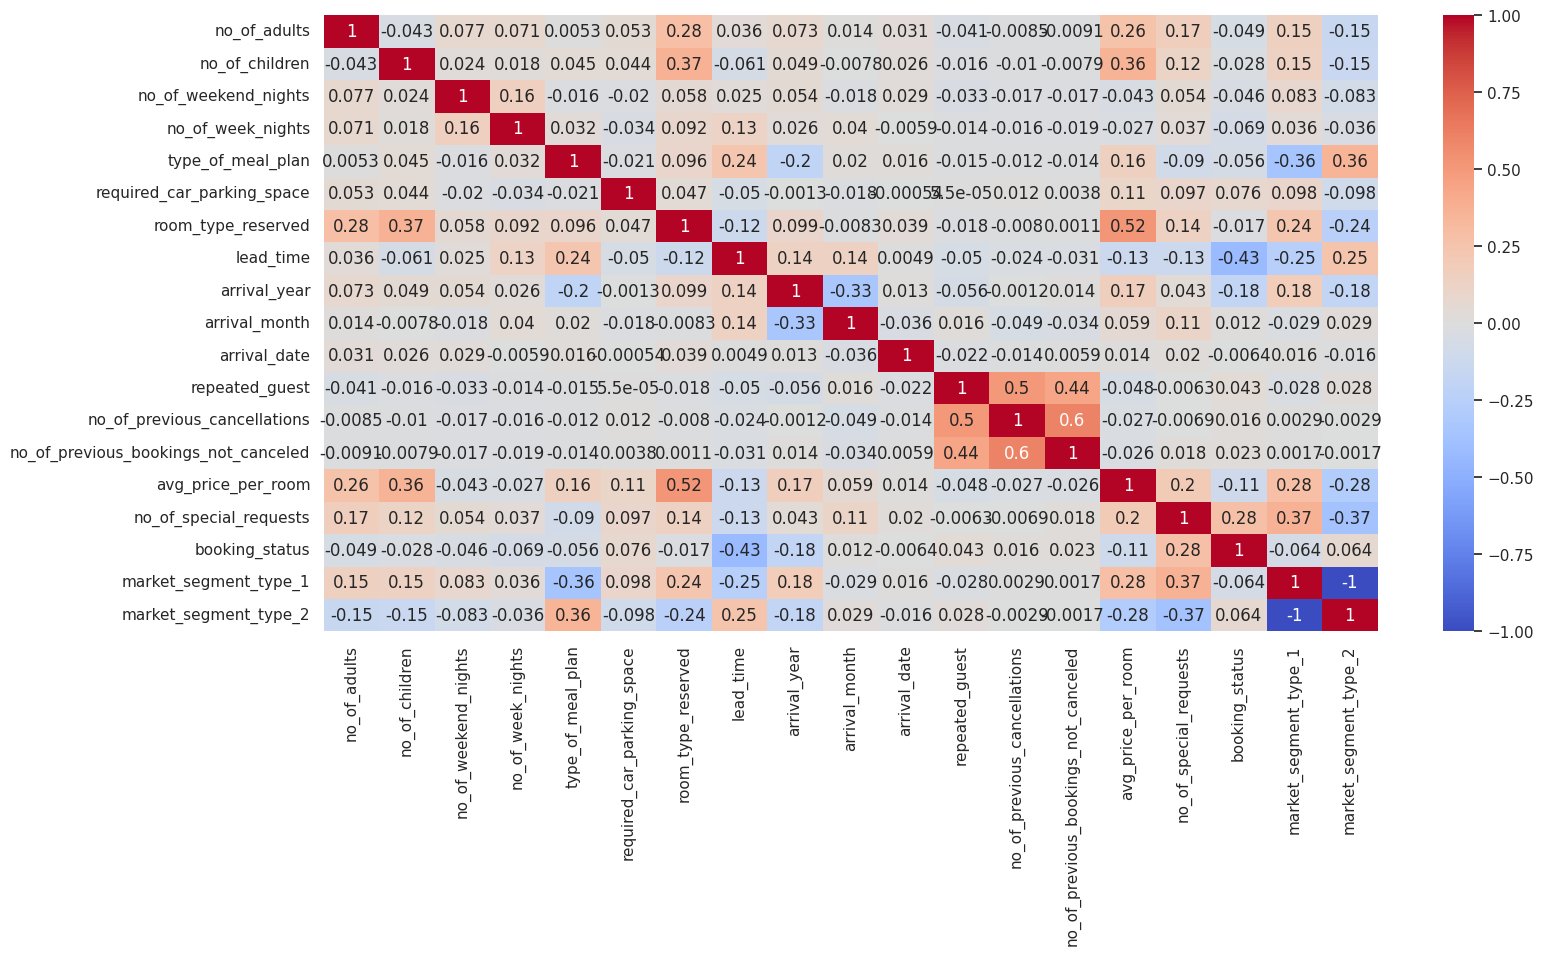

In [ ]:
plt.figure(figsize=(17, 8))
sb.heatmap(hotel_online_offline.corr(), annot=True, cmap='coolwarm')
plt.show()

#Machine Learning Techniques


After exploring and cleaning the dataset, we then carried on to implement 5 machine learning techniques to find out which are the important factors that will most likely influence the hotel cancellation. The 5 ML techniques include multivariate linear regression, logistic regression, K-nearest-neighbour, Decision Tree and last but not least random forest. 


#1. Multi-variate linear regression

Observing that no single variable had a high correlation with booking_status, we want to see if a combination of variables would have a greater correlation with booking_status. Multi-variate linear regression is a statistical approach to identify the linear relationship between the independent variables and the dependent variable, and it is useful for making predictions and understanding the impact of 3 independent variables, 'lead_time', 'avg_price_per_room', 'no_of_special_requests',  on the dependent variable 'booking_status'.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the data into a pandas DataFrame
data = hotel_online_offline

# Split the data into dependent and independent variables
X = data[['lead_time', 'avg_price_per_room', 'no_of_special_requests']]
Y = data['booking_status']

# Create a linear regression object
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Print the coefficients
print(model.coef_)

# Make predictions on new data
new_data = pd.DataFrame({'lead_time': [1, 2], 'avg_price_per_room': [3, 4], 'no_of_special_requests': [5, 6]})
print(model.predict(new_data))

[-0.0023166  -0.00306099  0.158828  ]
[1.86875225 2.02220266]


Coefficients: The coefficients represent the slope of the regression line for each independent variable. The coefficients are -0.0023166 for lead time, -0.00306099 for average price per room, and 0.158828 for number of special requests. This means that as the lead time and average price per room increase, the predicted booking status is expected to decrease slightly, whereas an increase in the number of special requests is expected to increase the predicted booking status.

Prediction: The code also uses the model to predict the booking status of new data, which is a DataFrame containing two sets of values for each independent variable. The predicted booking statuses for these new values are 1.86875225 and 2.02220266, respectively.

However, since multivariate linear regression is used for continuous output variables, where the goal is to model the relationship between several independent variables and a dependent variable. It assumes that the relationship between the independent and dependent variables is linear, and it seeks to find a straight line that best fits the data. But, booking_status is a categorical variable.

#2. Logistic Regression

Therefore, logistic regression, on the other hand, is used for binary classification problems, where the output variable is a binary value (0 or 1). It models the probability of an event occurring based on one or more independent variables, and it is used to predict the likelihood of an outcome.

Logistic regression is a relatively simple algorithm that does not require a lot of computational resources, making working with larger datasets easier. It also handles datasets with outliers better than multi-variate linear regression.

Logistic regression is typically used for classification problems where the outcome variable is categorical. On the other hand, multi-variate linear regression is used for predicting continuous outcomes. Furthermore, logistic regression has a higher accuracy score than multi variate linear regression.

As such, logistic regression is more suited for our categorical outcome variable 'booking_status', where it is binary. It is also designed specifically for binary or categorical outcomes and models the relationship between the predictors and the probability of the outcome, instead of the outcome itself, which is more in line with our problem definition and motivation!

In [ ]:
# Logistic Regression

X = hotel_data.iloc[:,:15] #Choosing lead_time	and avg_price_per_room as independent variables
y = hotel_data.iloc[:,16] #Choosing booking_status as the dependent variable

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred,average="weighted")

print(accuracy_lr, f1_lr)

0.5557291188091519 0.4989466782634416


An accuracy of 0.5557291188091519 means that the logistic regression model correctly predicted the booking status of 55.57% of the test instances. This is not a particularly high accuracy score, indicating that the model may not be very effective.

The F1 score of 0.4989466782634416 is a weighted average of the precision and recall of the model. It takes into account both false positives and false negatives. A low F1 score suggests that the model is not very precise or is not very good at finding true positives.


Overall, the low accuracy and F1 score suggest that the logistic regression model may not be the best choice for this particular problem or that the model may need more features to improve its performance.

#3. K-Nearest-Neighbour

In [ ]:

# random forest classifier
X = hotel_data.iloc[:,:15]
y = hotel_data.iloc[:,16]
#hotel_data.head()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred,average='weighted')

print(accuracy_knn, f1_knn)

0.590829734448222 0.565088320592351


Accuracy: The accuracy score of the KNN model is 0.591, which means that the model correctly classified 59.1% of the test set samples. This score indicates the overall performance of the model.

F1-score: The F1-score of the KNN model is 0.565, which is a weighted average of the precision and recall of the model. It is a useful metric for evaluating the performance of a binary classification model, especially when the classes are imbalanced.

When comparing the results obtained from both KNN and logistic regression, we can infer that KNN is better than logistic regression as seen from the accuracy. This is because of these two points:

Non-linear decision boundaries: KNN is a non-parametric algorithm that does not assume any particular form of the decision boundary between classes. If the decision boundary is highly non-linear, KNN may be able to capture it better than logistic regression, which assumes a linear decision boundary.

High-dimensional data: In high-dimensional spaces, the distance between any two points becomes very similar, and the concept of nearness may become less meaningful. KNN, which relies on distances between points, may be more effective in such scenarios than logistic regression, which may suffer from overfitting or underfitting.

#4. Confusion matrix and decision tree


Other than regression related ML techniques, we decide to use confusion matrix and decision tree as it is well suited for binary classification problems. Seeing that lead_time has a very high correlation coefficient with booking_status, we decided to make it as a predictor variable.

Response: booking_status

Predictor: lead_time

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7633011716057891

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7688490696071675



<Axes: >

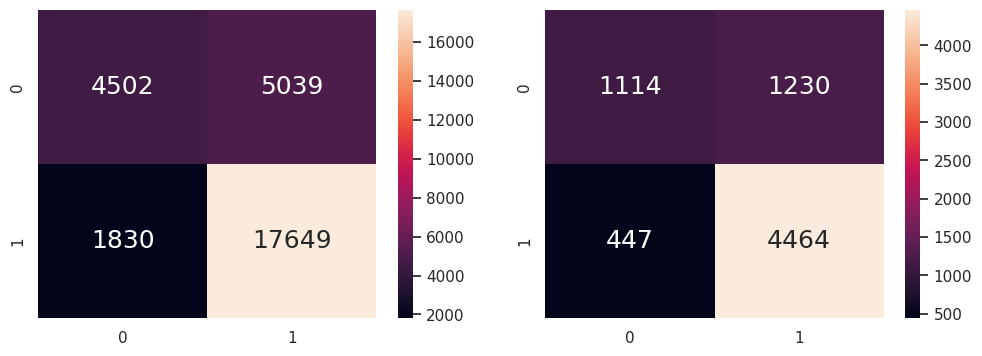

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

BS = pd.DataFrame(hotel_data['booking_status'])  # Response
MST = pd.DataFrame(hotel_data['lead_time'])   # Predictor

# Split the CA-SP Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(MST, BS, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict CA values corresponding to SP
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.5267857142857143, 0.9285714285714286, 'Lead time <= 151.5\ngini = 0.441\nsamples = 29020\nvalue = [9541, 19479]\nclass = 1'),
 Text(0.24523809523809523, 0.7857142857142857, 'Lead time <= 16.5\ngini = 0.357\nsamples = 23298\nvalue = [5411, 17887]\nclass = 1'),
 Text(0.1, 0.6428571428571429, 'Lead time <= 7.5\ngini = 0.2\nsamples = 7112\nvalue = [800, 6312]\nclass = 1'),
 Text(0.0380952380952381, 0.5, 'Lead time <= 2.5\ngini = 0.157\nsamples = 4629\nvalue = [397, 4232]\nclass = 1'),
 Text(0.01904761904761905, 0.35714285714285715, 'Lead time <= 0.5\ngini = 0.128\nsamples = 2420\nvalue = [166, 2254]\nclass = 1'),
 Text(0.009523809523809525, 0.21428571428571427, 'gini = 0.102\nsamples = 1056\nvalue = [57, 999]\nclass = 1'),
 Text(0.02857142857142857, 0.21428571428571427, 'Lead time <= 1.5\ngini = 0.147\nsamples = 1364\nvalue = [109, 1255]\nclass = 1'),
 Text(0.01904761904761905, 0.07142857142857142, 'gini = 0.178\nsamples = 863\nvalue = [85, 778]\nclass = 1'),
 Text(0.03809523809523

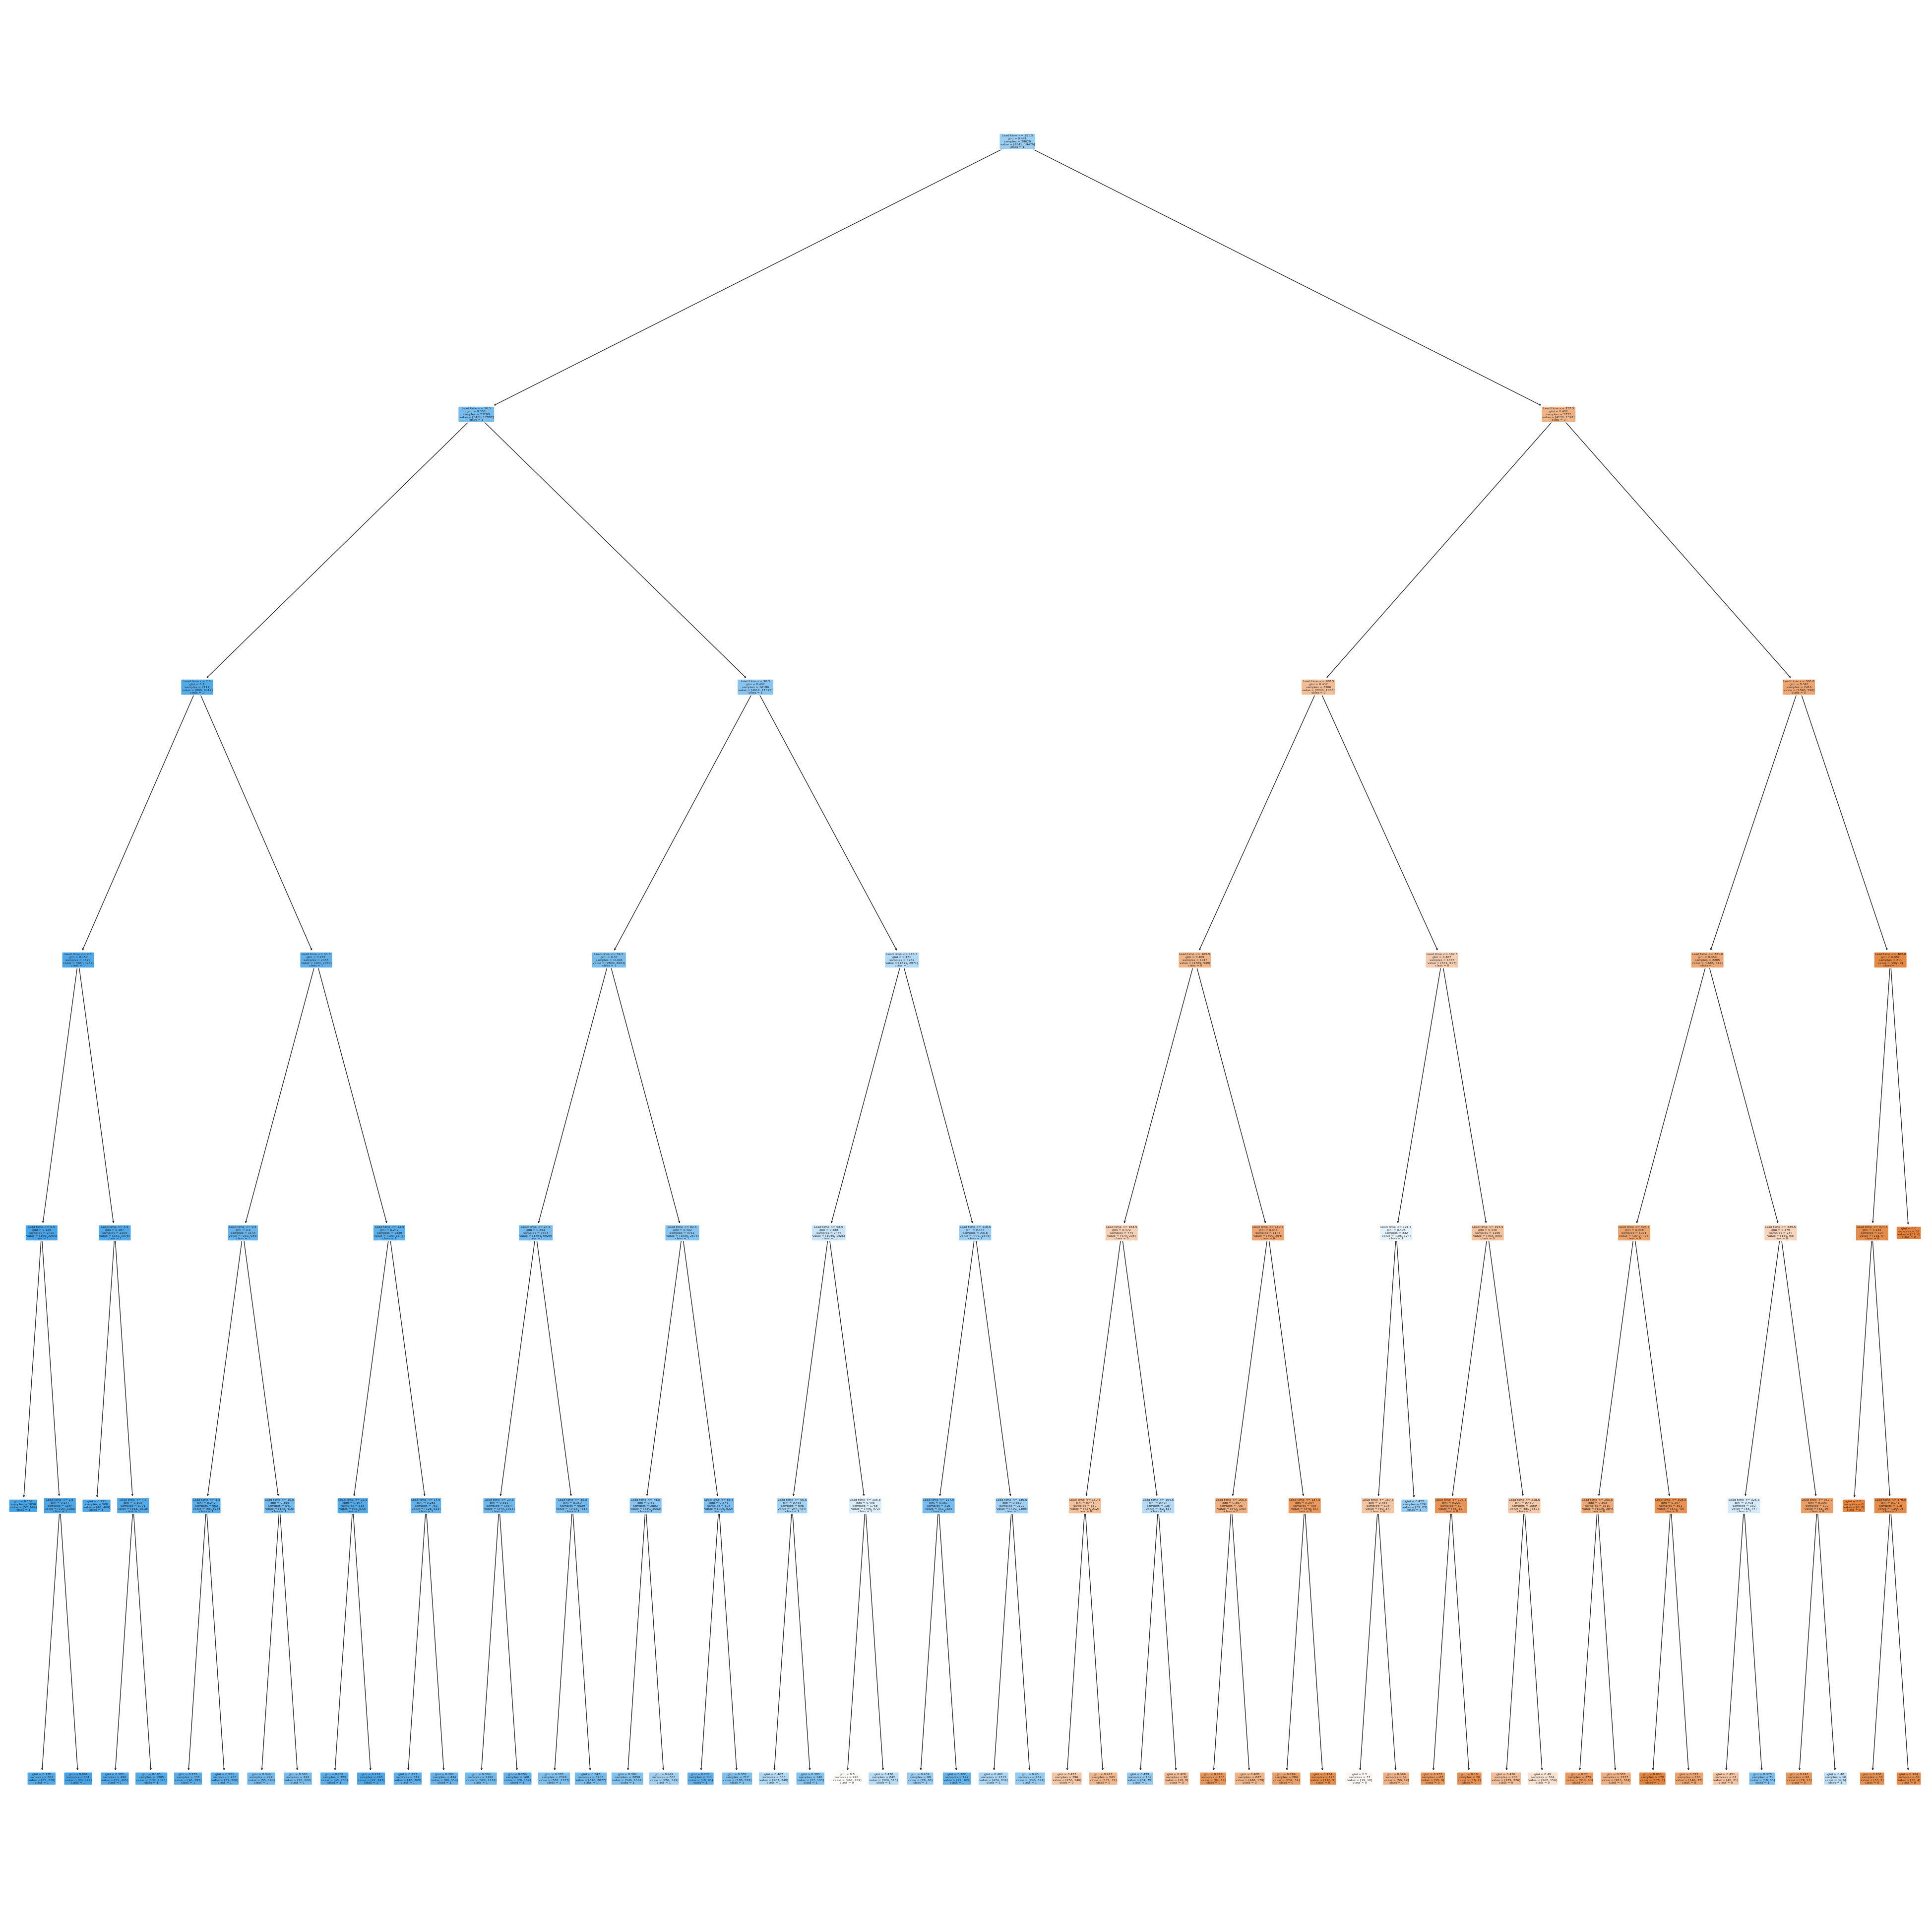

In [ ]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(50,50))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Lead time"], 
          class_names=["0","1"])

However, using a single variable "lead_time" as a predictor for the confusion matrix and decision tree resulted in a lower classification accuracy of 0.7659545141281875. Hence, a better ML technique should be used.

#5. Random Forest
Using the cleaned data set, we decided to improve further on the accuracy of the classification tree by using a Random Forest Classification which is better than a single decision tree because it reduces overfitting, handles high-dimensional data, is robust to noise and outliers, produces more accurate predictions, and provides better feature importance estimation. In addition, we used more than just one variable as our predictor which allows to check the relationship between the variables.


Random Forest classification works by building an ensemble of decision trees that are trained on random subsets of the data and features, with each tree providing a different view of the data. The predictions of the trees are combined to make a final prediction that is more accurate and less prone to overfitting than a single decision tree.

In [ ]:
null_values = hotel_online_offline.isnull().sum()


# print the location of NaN values
print("Location of NaN values:")
print(null_values[null_values > 0])

Location of NaN values:
Series([], dtype: int64)


In [ ]:
# random forest classifier
X = hotel_online_offline.iloc[:,:15]
y = hotel_online_offline.iloc[:,16]
#hotel_data.head()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

print(accuracy_rf, f1_rf)

0.8311765286970266 0.8771652411413785



Accuracy: The accuracy score of the Random Forest Classification model is 0.831.
F1-score: The F1-score of the Random Forest Classification model is 0.877

Seeing that the classification accuracy for Random Forest Classification is higher than both KNN and logistic regression, we can conclude that we are dealing with high-dimensional data, non-linear relationships, imbalanced classes, presence of outliers, and robustness to noise.

This is because Random Forest can be better than both KNN and logistic regression in the following cases:

1) High-dimensional data: When the number of features is high, both KNN and logistic regression can struggle to capture the underlying patterns in the data. Random Forest, on the other hand, can handle high-dimensional data by selecting a random subset of features for each tree.

2) Non-linear relationships: When the relationship between the features and the target variable is non-linear, logistic regression may not perform well. KNN can also struggle with non-linear relationships, as it relies on the assumption that similar points have similar labels. Random Forest can capture non-linear relationships by building decision trees on different subsets of the data and combining their predictions.

3) Imbalanced classes: When the classes are imbalanced, logistic regression can be biased towards the majority class. KNN can also be affected by imbalanced classes, as it relies on the nearest neighbors to make predictions. Random Forest can handle imbalanced classes by balancing the class weights or by oversampling the minority class.

4) Presence of outliers: When there are outliers in the data, both KNN and logistic regression can be affected. KNN relies on the nearest neighbors, and outliers can skew the distances between points. Logistic regression is also sensitive to outliers, as they can influence the estimated coefficients. Random Forest can handle outliers by building decision trees on different subsets of the data, which reduces the impact of individual data points.

5) Robustness to noise: When the data contains noise, both KNN and logistic regression can be affected. KNN can be sensitive to noise, as it relies on the nearest neighbors to make predictions. Logistic regression is also sensitive to noise, as it can result in overfitting. Random Forest can handle noise by building decision trees on different subsets of the data, which reduces the impact of individual noisy data points.

First 3 classification tree from the random forest classification the depth of 3 (Results may vary)

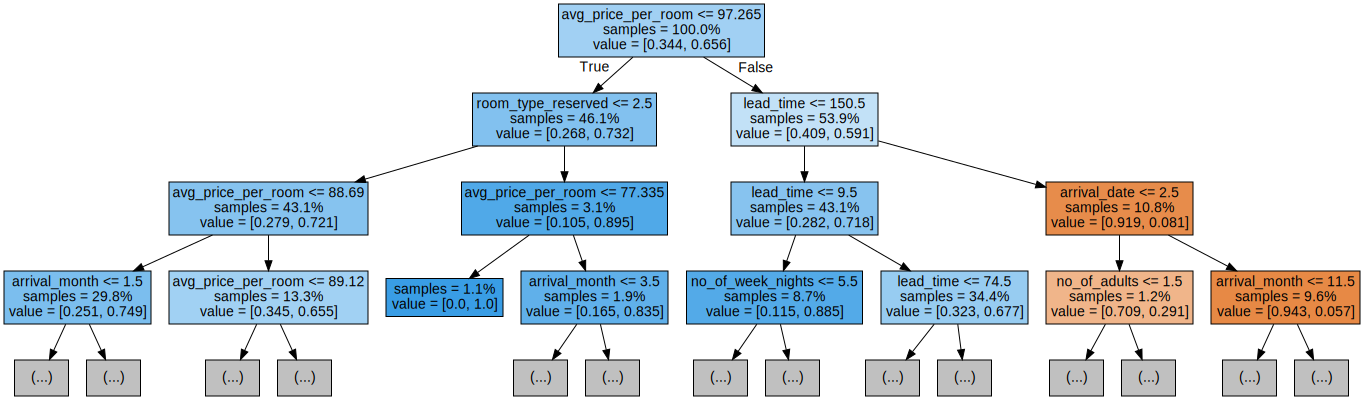

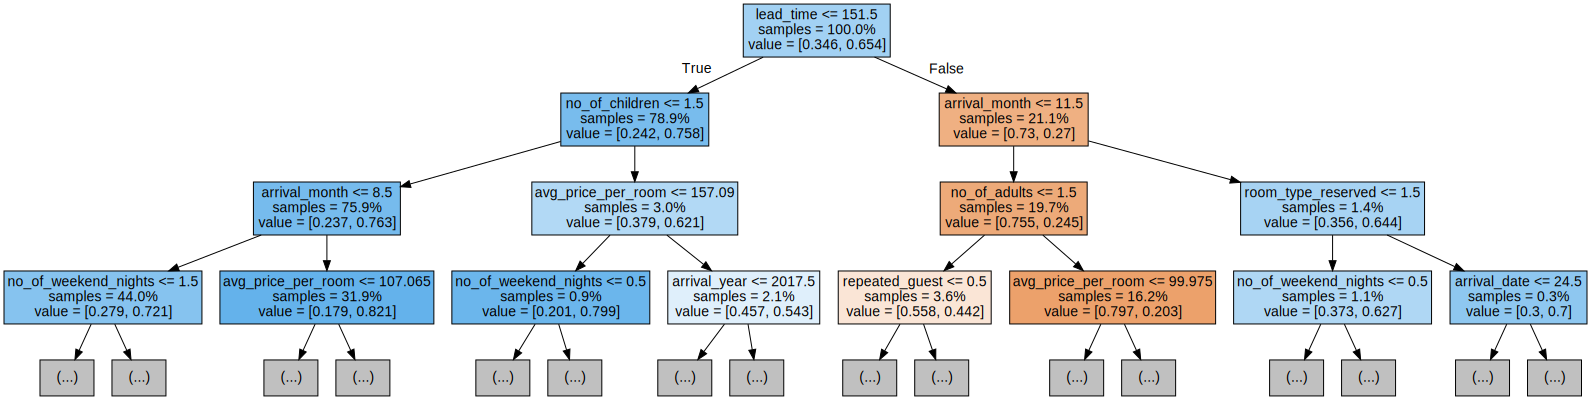

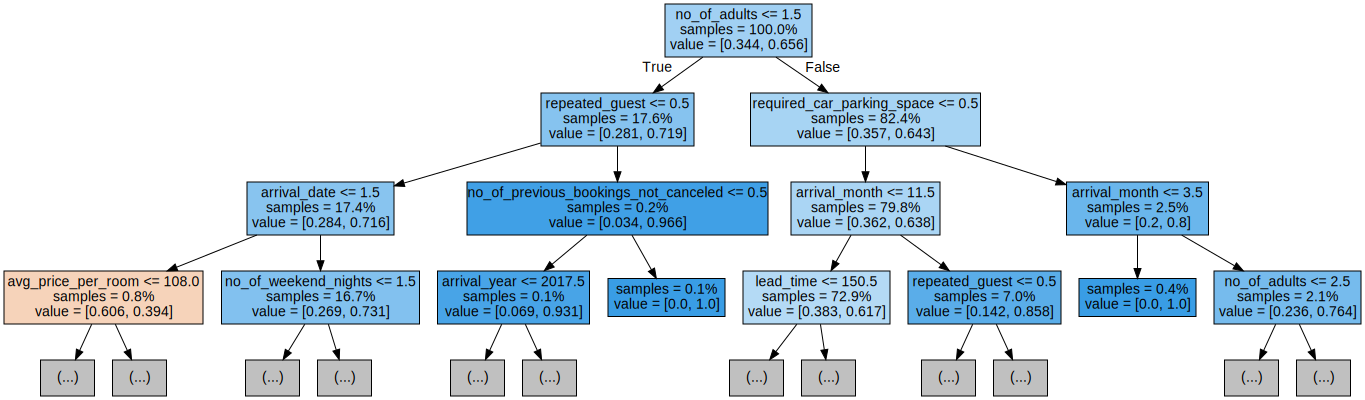

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=3,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Extracting the feature importances and visualizing it in bar graph to see which variables are the best predictors for booking status.

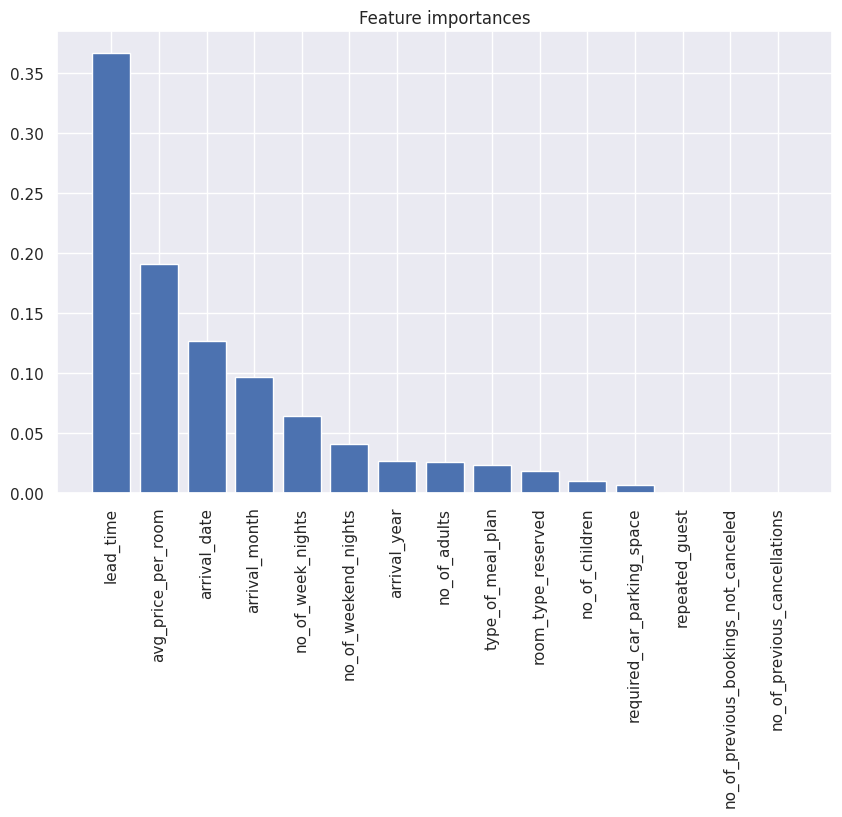

In [ ]:
rf.fit(X_train, y_train)

# Extract the feature importances
importances = rf.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Visualize the feature importances
plt.figure(figsize=(10,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

From the classification trees and the feature importance graph, it is clear that the 4 variables that influences booking status the most are:

1. lead_time
2. avg_price_per_room
3. arrival_date
4. arrival_month


#Conclusion

Comparing the results from the ML techniques, we decided to go with random forest as it has the highest accuracy of 0.831 which is significantly  higher than both KNN and logistic regression, from this we can conclude that we are dealing with high-dimensional data, with non-linear relationships, containing imbalanced classes, with outliers present and highly noisy data as Random forest are better than the other techniques when dealing with datasets with such characteristics .


After looking through the results from the random forest, we decided to use lead_time and average_price_of_room as these 2 variables have the highest feature importance.


For the values stated below, please refer to the slides in the presentation:


1. From average_price_of_room, we can see that when the price of a room is <=76.54, the cancellation rate is at 0.144. However, when the price of a room is <=88.555, the cancellation rate increases significantly to 0.367. This is reflected in real life cases, where thrifty customers would want to get the best deals possible and would cancel their bookings if they find a cheaper alternative. 


2. Moving on to lead_time, we can see, when lead_time decreases from 244.5 ->68.5 days, cancellation rate decreases significantly from 39% -> 21.6%. However, when lead_time increases from 244.5->333.5 days, the cancellation rate decreases too. At first glance, this observation may seem very weird. However, on closer analysis, this can be seen in real life. People who book closer to their arrival date are less likely to cancel as it is harder to find an alternative hotel. Similarly, people who book very far from their date are unlikely to cancel, as they may have made firm travel plans and committed to their trip.







Hence, one potential solution we would suggest to assist hotels in maximising their operations and reducing losses stemming from cancelled reservations is to provide reduced prices for rooms during the sweet spot period with the highest cancellation rate when customers make reservations with respect to their lead time. 


#Overall Conclusion

Overall, this mini project has provided us with a wealth of new insights and knowledge that extend beyond the scope of this course. Initially, we had assumed that a single factor was responsible for influencing booking status. However, through meticulous exploration and cleaning of the data, we employed a diverse range of machine learning techniques, 4 of which were entirely new to us. We incorporated these methods to counteract the limitations of the previous techniques that we had previously used. In the end, we realised that random forest was the best technique to answer our problem for this dataset as it yields the best accuracy out of all ML techniques. Furthermore, we realised that we were dealing with a high-dimensional data, with non-linear relationships, containing imbalanced classes, with outliers present and highly noisy data as Random forest are better than the other techniques when dealing with datasets with such characteristics. To our surprise, our initial assumption was incorrect. Instead, we discovered that a combination of factors, including lead time, average price per room, and arrival month, was responsible for influencing people to cancel their reservations. This experience taught us the importance of avoiding initial judgments that may influence our analysis and instead we should follow a systematic approach.